In [1]:
import yaml
from provider_valid import *
import torch
from skimage.feature import hog
from attrdict import AttrDict
import time
import torch
import sys
import numpy as np
import random
sys.path.append('/code/SuperHuman-main/scripts/scripts')
from utils.show import show_one
from sklearn.metrics import f1_score

seed = 555
np.random.seed(seed)
random.seed(seed)
cfg_file = 'seg_3d.yaml'
with open('/code/SuperHuman-main/scripts/scripts/config/' + cfg_file, 'r') as f:
    cfg = AttrDict( yaml.safe_load(f) )

out_path = os.path.join('/code/SuperHuman-main/', 'data_temp')
if not os.path.exists(out_path):
    os.mkdir(out_path)

data = Provider_valid(cfg)
dataloader = torch.utils.data.DataLoader(data, batch_size=2, num_workers=0,
                                            shuffle=False, drop_last=False, pin_memory=True)

gt_affs = data.get_gt_affs()
pred = np.random.random(tuple(gt_affs.shape)).astype(np.float32)
pred[pred <= 0.5] = 0
pred[pred > 0.5] = 1
gt_affs = gt_affs.astype(np.uint8)
pred = pred.astype(np.uint8)
gt_affs = gt_affs.flatten()
pred = pred.flatten()
f1 = f1_score(1 - gt_affs, 1- pred)
print(f1)

valid on valid dataset!
the number of valid(test) = 50
load cremiC_inputs_interp.h5 ...
0.20118207407331565


In [2]:
for imgs,label,weight in dataloader:
    print(imgs.shape)
    print(label.shape)
    print(weight.shape)
    break

torch.Size([2, 1, 18, 160, 160])
torch.Size([2, 3, 18, 160, 160])
torch.Size([2, 3, 18, 160, 160])


In [3]:
from model.unetr import UNETR
from model.model_superhuman import UNet_PNI
from model.unet3d_mala import UNet3D_MALA

In [4]:
superhuman_state = torch.load('/data/cyd0806/superhuman/models/superhuman_model_MSE_CREMIC_0106/2023-01-07--13-49-05_seg_3d/model-076000.pt')['model_weights']
superhuman_new = {}
for k, v in superhuman_state.items():
    superhuman_new[k[7:]] = v

In [7]:
model = UNet_PNI(in_planes=cfg.MODEL.input_nc,
                        out_planes=cfg.MODEL.output_nc,
                        filters=cfg.MODEL.filters,
                        upsample_mode=cfg.MODEL.upsample_mode,
                        decode_ratio=cfg.MODEL.decode_ratio,
                        merge_mode=cfg.MODEL.merge_mode,
                        pad_mode=cfg.MODEL.pad_mode,
                        bn_mode=cfg.MODEL.bn_mode,
                        relu_mode=cfg.MODEL.relu_mode,
                        init_mode=cfg.MODEL.init_mode)

# model = UNETR(
#                         in_channels=cfg.MODEL.input_nc,
#                         out_channels=cfg.MODEL.output_nc,
#                         img_size=cfg.MODEL.unetr_size,
#                         patch_size=cfg.MODEL.patch_size,
#                         kernel_size=cfg.MODEL.kernel_size,
#                         feature_size=16,
#                         hidden_size=768, # 768
#                         mlp_dim=3072,  # 3072
#                         num_heads=12,  # 12
#                         pos_embed='perceptron',
#                         norm_name='instance',
#                         conv_block=True,
#                         res_block=True,
#                         dropout_rate=0.0)

# model = UNet3D_MALA(output_nc=cfg.MODEL.output_nc,
#                             if_sigmoid=cfg.MODEL.if_sigmoid, 
#                             init_mode=cfg.MODEL.init_mode_mala)

model.load_state_dict(superhuman_new)

RuntimeError: Error(s) in loading state_dict for UNet3D_MALA:
	Missing key(s) in state_dict: "conv1.weight", "conv1.bias", "conv2.weight", "conv2.bias", "conv3.weight", "conv3.bias", "conv4.weight", "conv4.bias", "conv5.weight", "conv5.bias", "conv6.weight", "conv6.bias", "conv7.weight", "conv7.bias", "conv8.weight", "conv8.bias", "dconv1.weight", "conv9.weight", "conv9.bias", "conv10.weight", "conv10.bias", "conv11.weight", "conv11.bias", "dconv2.weight", "conv12.weight", "conv12.bias", "conv13.weight", "conv13.bias", "conv14.weight", "conv14.bias", "dconv3.weight", "conv15.weight", "conv15.bias", "conv16.weight", "conv16.bias", "conv17.weight", "conv17.bias", "conv18.weight", "conv18.bias". 
	Unexpected key(s) in state_dict: "embed_in.0.weight", "embed_in.0.bias", "conv0.block1.0.weight", "conv0.block1.1.weight", "conv0.block1.1.bias", "conv0.block1.1.running_mean", "conv0.block1.1.running_var", "conv0.block1.1.num_batches_tracked", "conv0.block2.0.weight", "conv0.block2.1.weight", "conv0.block2.1.bias", "conv0.block2.1.running_mean", "conv0.block2.1.running_var", "conv0.block2.1.num_batches_tracked", "conv0.block2.3.weight", "conv0.block3.weight", "conv0.block3.bias", "conv0.block3.running_mean", "conv0.block3.running_var", "conv0.block3.num_batches_tracked", "center.block1.0.weight", "center.block1.1.weight", "center.block1.1.bias", "center.block1.1.running_mean", "center.block1.1.running_var", "center.block1.1.num_batches_tracked", "center.block2.0.weight", "center.block2.1.weight", "center.block2.1.bias", "center.block2.1.running_mean", "center.block2.1.running_var", "center.block2.1.num_batches_tracked", "center.block2.3.weight", "center.block3.weight", "center.block3.bias", "center.block3.running_mean", "center.block3.running_var", "center.block3.num_batches_tracked", "up0.1.weight", "up0.1.bias", "cat0.0.weight", "cat0.0.bias", "cat0.0.running_mean", "cat0.0.running_var", "cat0.0.num_batches_tracked", "up1.1.weight", "up1.1.bias", "cat1.0.weight", "cat1.0.bias", "cat1.0.running_mean", "cat1.0.running_var", "cat1.0.num_batches_tracked", "up2.1.weight", "up2.1.bias", "cat2.0.weight", "cat2.0.bias", "cat2.0.running_mean", "cat2.0.running_var", "cat2.0.num_batches_tracked", "up3.1.weight", "up3.1.bias", "cat3.0.weight", "cat3.0.bias", "cat3.0.running_mean", "cat3.0.running_var", "cat3.0.num_batches_tracked", "embed_out.0.weight", "embed_out.0.bias", "out_put.0.weight", "out_put.0.bias", "conv1.block1.0.weight", "conv1.block1.1.weight", "conv1.block1.1.bias", "conv1.block1.1.running_mean", "conv1.block1.1.running_var", "conv1.block1.1.num_batches_tracked", "conv1.block2.0.weight", "conv1.block2.1.weight", "conv1.block2.1.bias", "conv1.block2.1.running_mean", "conv1.block2.1.running_var", "conv1.block2.1.num_batches_tracked", "conv1.block2.3.weight", "conv1.block3.weight", "conv1.block3.bias", "conv1.block3.running_mean", "conv1.block3.running_var", "conv1.block3.num_batches_tracked", "conv2.block1.0.weight", "conv2.block1.1.weight", "conv2.block1.1.bias", "conv2.block1.1.running_mean", "conv2.block1.1.running_var", "conv2.block1.1.num_batches_tracked", "conv2.block2.0.weight", "conv2.block2.1.weight", "conv2.block2.1.bias", "conv2.block2.1.running_mean", "conv2.block2.1.running_var", "conv2.block2.1.num_batches_tracked", "conv2.block2.3.weight", "conv2.block3.weight", "conv2.block3.bias", "conv2.block3.running_mean", "conv2.block3.running_var", "conv2.block3.num_batches_tracked", "conv3.block1.0.weight", "conv3.block1.1.weight", "conv3.block1.1.bias", "conv3.block1.1.running_mean", "conv3.block1.1.running_var", "conv3.block1.1.num_batches_tracked", "conv3.block2.0.weight", "conv3.block2.1.weight", "conv3.block2.1.bias", "conv3.block2.1.running_mean", "conv3.block2.1.running_var", "conv3.block2.1.num_batches_tracked", "conv3.block2.3.weight", "conv3.block3.weight", "conv3.block3.bias", "conv3.block3.running_mean", "conv3.block3.running_var", "conv3.block3.num_batches_tracked", "conv4.block1.0.weight", "conv4.block1.1.weight", "conv4.block1.1.bias", "conv4.block1.1.running_mean", "conv4.block1.1.running_var", "conv4.block1.1.num_batches_tracked", "conv4.block2.0.weight", "conv4.block2.1.weight", "conv4.block2.1.bias", "conv4.block2.1.running_mean", "conv4.block2.1.running_var", "conv4.block2.1.num_batches_tracked", "conv4.block2.3.weight", "conv4.block3.weight", "conv4.block3.bias", "conv4.block3.running_mean", "conv4.block3.running_var", "conv4.block3.num_batches_tracked", "conv5.block1.0.weight", "conv5.block1.1.weight", "conv5.block1.1.bias", "conv5.block1.1.running_mean", "conv5.block1.1.running_var", "conv5.block1.1.num_batches_tracked", "conv5.block2.0.weight", "conv5.block2.1.weight", "conv5.block2.1.bias", "conv5.block2.1.running_mean", "conv5.block2.1.running_var", "conv5.block2.1.num_batches_tracked", "conv5.block2.3.weight", "conv5.block3.weight", "conv5.block3.bias", "conv5.block3.running_mean", "conv5.block3.running_var", "conv5.block3.num_batches_tracked", "conv6.block1.0.weight", "conv6.block1.1.weight", "conv6.block1.1.bias", "conv6.block1.1.running_mean", "conv6.block1.1.running_var", "conv6.block1.1.num_batches_tracked", "conv6.block2.0.weight", "conv6.block2.1.weight", "conv6.block2.1.bias", "conv6.block2.1.running_mean", "conv6.block2.1.running_var", "conv6.block2.1.num_batches_tracked", "conv6.block2.3.weight", "conv6.block3.weight", "conv6.block3.bias", "conv6.block3.running_mean", "conv6.block3.running_var", "conv6.block3.num_batches_tracked", "conv7.block1.0.weight", "conv7.block1.1.weight", "conv7.block1.1.bias", "conv7.block1.1.running_mean", "conv7.block1.1.running_var", "conv7.block1.1.num_batches_tracked", "conv7.block2.0.weight", "conv7.block2.1.weight", "conv7.block2.1.bias", "conv7.block2.1.running_mean", "conv7.block2.1.running_var", "conv7.block2.1.num_batches_tracked", "conv7.block2.3.weight", "conv7.block3.weight", "conv7.block3.bias", "conv7.block3.running_mean", "conv7.block3.running_var", "conv7.block3.num_batches_tracked". 

In [ ]:
from utils.show import show_affs, show_affs_whole
from loss.loss import WeightedMSE, WeightedBCE
from loss.loss import MSELoss, BCELoss
from tqdm import tqdm 
model = model.cuda()
criterion = WeightedMSE()
iters = 1
if cfg.TRAIN.if_valid:
    if iters % cfg.TRAIN.save_freq == 0 or iters == 1:
        device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        model = model.to(device)
        model.eval()
        dataloader = torch.utils.data.DataLoader(data, batch_size=1, num_workers=0,
                                        shuffle=False, drop_last=False, pin_memory=True)
        losses_valid = []
        #记录开始时间
        start = time.time()
        for k, batch in tqdm(enumerate(dataloader, 0)):
            inputs, target, weightmap = batch
            inputs = inputs.to(device)
            target = target.to(device)
            weightmap = weightmap.to(device)
            with torch.no_grad():
                pred = model(inputs)
            tmp_loss = criterion(pred, target, weightmap)
            losses_valid.append(tmp_loss.item())
            data.add_vol(np.squeeze(pred.data.cpu().numpy()))
        #记录结束时间
        end = time.time()
        
        epoch_loss = sum(losses_valid) / len(losses_valid)
        out_affs = data.get_results()
        gt_affs = data.get_gt_affs().copy()
        gt_seg = data.get_gt_lb()
        data.reset_output()
        out_affs = out_affs[:3]
        # gt_affs = gt_affs[:, :3]
        show_affs_whole(iters, out_affs, gt_affs, '/code/SuperHuman-main/data_temp')

845it [03:51,  3.65it/s]


In [ ]:
import waterz
from utils.lmc import mc_baseline
from utils.fragment import watershed, randomlabel
sf = 'OneMinus<HistogramQuantileAffinity<RegionGraphType, 50, ScoreValue, 256>>'
# truth = data.get_gt_affs()[:3]
fragments = watershed(out_affs, 'maxima_distance')
seg_waterz = list(waterz.agglomerate(out_affs, [0.50],
                                                            fragments=fragments,
                                                            scoring_function=sf,
                                                            discretize_queue=256))[0]

Re-using already compiled waterz version
Creating memory-contiguous affinity arrray (avoid this by passing C_CONTIGUOUS arrays)
Preparing segmentation volume...
counting regions and sizes...
creating region graph for 217948 nodes
creating statistics provider
extracting region graph...
Region graph number of edges: 1066118
merging until threshold 0.5
computing initial scores
merging until 0.5
min edge score 0.00195312
threshold exceeded
merged 213077 edges
extracting segmentation


In [ ]:
seg_waterz.shape

(50, 1024, 1024)

In [ ]:
seg_waterz[0]

array([[  82,   82,   82, ...,   22,   22,   22],
       [  82,   82,   82, ...,   22,   22,   22],
       [  82,   82,   82, ...,   22,   22,   22],
       ...,
       [2974, 2974, 2974, ...,   15,   15,   15],
       [2974, 2974, 2974, ...,   15,   15,   15],
       [2974, 2974, 2974, ...,   15,   15,   15]], dtype=uint64)

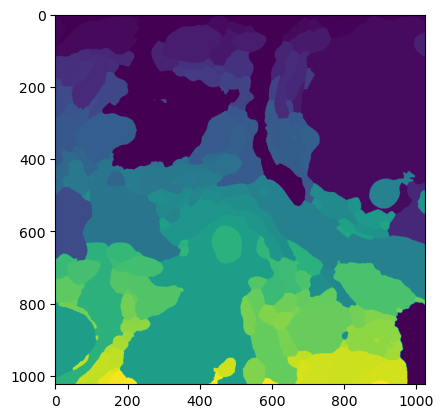

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(seg_waterz[0])

In [ ]:
# 保存nii文件
import nibabel as nib
# 保存seg_waterz
seg_waterz1 = nib.Nifti1Image(seg_waterz, np.eye(4))
nib.save(seg_waterz1, '/data/cyd0806/superhuman/IJCAI_visualization/UNETR4_CREMIC.nii.gz')
out_affs1 = nib.Nifti1Image(out_affs, np.eye(4))
nib.save(out_affs1, '/data/cyd0806/superhuman/IJCAI_visualization/UNETR4_CREMIC_affs.nii.gz')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Image data has type uint64, which may cause incompatibilities with other tools. This will error in NiBabel 5.0. This warning can be silenced by passing the dtype argument to Nifti1Image().
  after removing the cwd from sys.path.
